# 科学技術計算 1 レポートテンプレート


In [1]:
import math
import cmath
from typing import Tuple, List
import numpy as np
import scipy

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["savefig.bbox"] = "tight"

## 課題01-1

In [2]:
import numpy as np

def det_2x2or3x3(A: np.ndarray) -> float:

    # --- 行列サイズの確認 ---
    assert A.shape in [(2, 2), (3, 3)], "行列のサイズは 2x2 または 3x3 のみ対応しています。"

    # --- 2x2 の場合 ---
    if A.shape == (2, 2):
        det = A[0, 0]*A[1, 1] - A[0, 1]*A[1, 0]

    # --- 3x3 の場合 ---
    else:
        det = (
            A[0, 0]*(A[1, 1]*A[2, 2] - A[1, 2]*A[2, 1])
          - A[0, 1]*(A[1, 0]*A[2, 2] - A[1, 2]*A[2, 0])
          + A[0, 2]*(A[1, 0]*A[2, 1] - A[1, 1]*A[2, 0])
        )

    return float(det)



A = np.array([[1, 2],[3, 4]])
result = det_2x2or3x3(A)
print(result)  # -2.0


A = np.array([[1, 2, 3],[0, 1, 4],[5, 6, 0]])

result = det_2x2or3x3(A)
print(result)  # 1.0


A = np.array([[1, 2, 3, 4],[5, 6, 7, 8],[9, 10, 11, 12],[13, 14, 15, 16]])
result = det_2x2or3x3(A)# AssertionError

-2.0
1.0


AssertionError: 行列のサイズは 2x2 または 3x3 のみ対応しています。

## 課題01-5

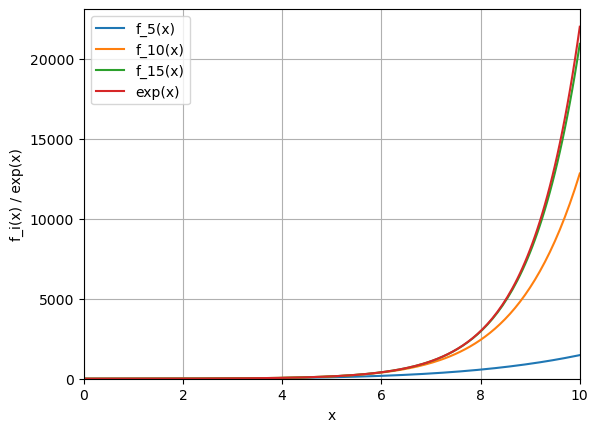

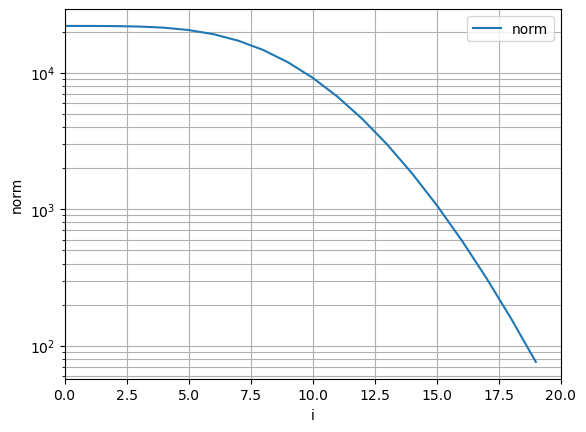

In [9]:
def exp_maclaurin_partial(x: np.ndarray,i: int) -> np.ndarray:
    y = 0
    for n in range(i + 1):
        y += x ** n / math.factorial(n)
    
    return y

    """f_i(x)を計算する関数"""

def norm(x: np.ndarray, i: int) -> float:
    """‖f_i(x) - e^x‖∞ を返す"""
    f_i = exp_maclaurin_partial(x, i)
    diff = np.abs(f_i - np.exp(x))
    return np.max(diff)


#グラフを出力する

from matplotlib import rcParams
rcParams["savefig.bbox"] = "tight"  # 周囲の余白を削除する

x = np.linspace(0, 10, 200)
y1 = exp_maclaurin_partial(x, 5)
y2 = exp_maclaurin_partial(x, 10)
y3 = exp_maclaurin_partial(x, 15)
y4 = np.exp(x)


fig = plt.figure()  # プロット用figureを作成
ax = fig.subplots()  # figureにaxisを作成


# labelには凡例用のラベル文字列を指定
ax.plot(x, y1, label="f_5(x)") 
ax.plot(x, y2, label="f_10(x)")
ax.plot(x, y3, label="f_15(x)")  
ax.plot(x, y4, label="exp(x)")

ax.set_xlabel("x")  # 横軸のラベル
ax.set_ylabel("f_i(x) / exp(x)")  # 縦軸のラベル
ax.set_xlim(0,10)  # 横軸の表示範囲
ax.set_ylim(0)  # 縦軸の表示範囲
ax.grid(True)
ax.legend()  # 凡例を作成


# ノルム計算
i = np.arange(0, 20)
sup_norms = [norm(x, n) for n in i]

fig = plt.figure()  # プロット用figureを作成
ax = fig.subplots()  # figureにaxisを作成



#ここからプロットを作成するコードを書く

ax.plot(i, sup_norms, label="norm")
ax.set_yscale("log")  # 対数目盛
#ax.set_ylim(0)
ax.set_xlabel("i")
ax.set_ylabel("norm")

ax.set_xlim(0,20)  # 横軸の表示範囲
ax.grid(True, which="both")
ax.legend()
plt.show()
